# **Final Project** - TWITCH 💻🎮

*This Notebook was made by Héloïse de Castelnau*

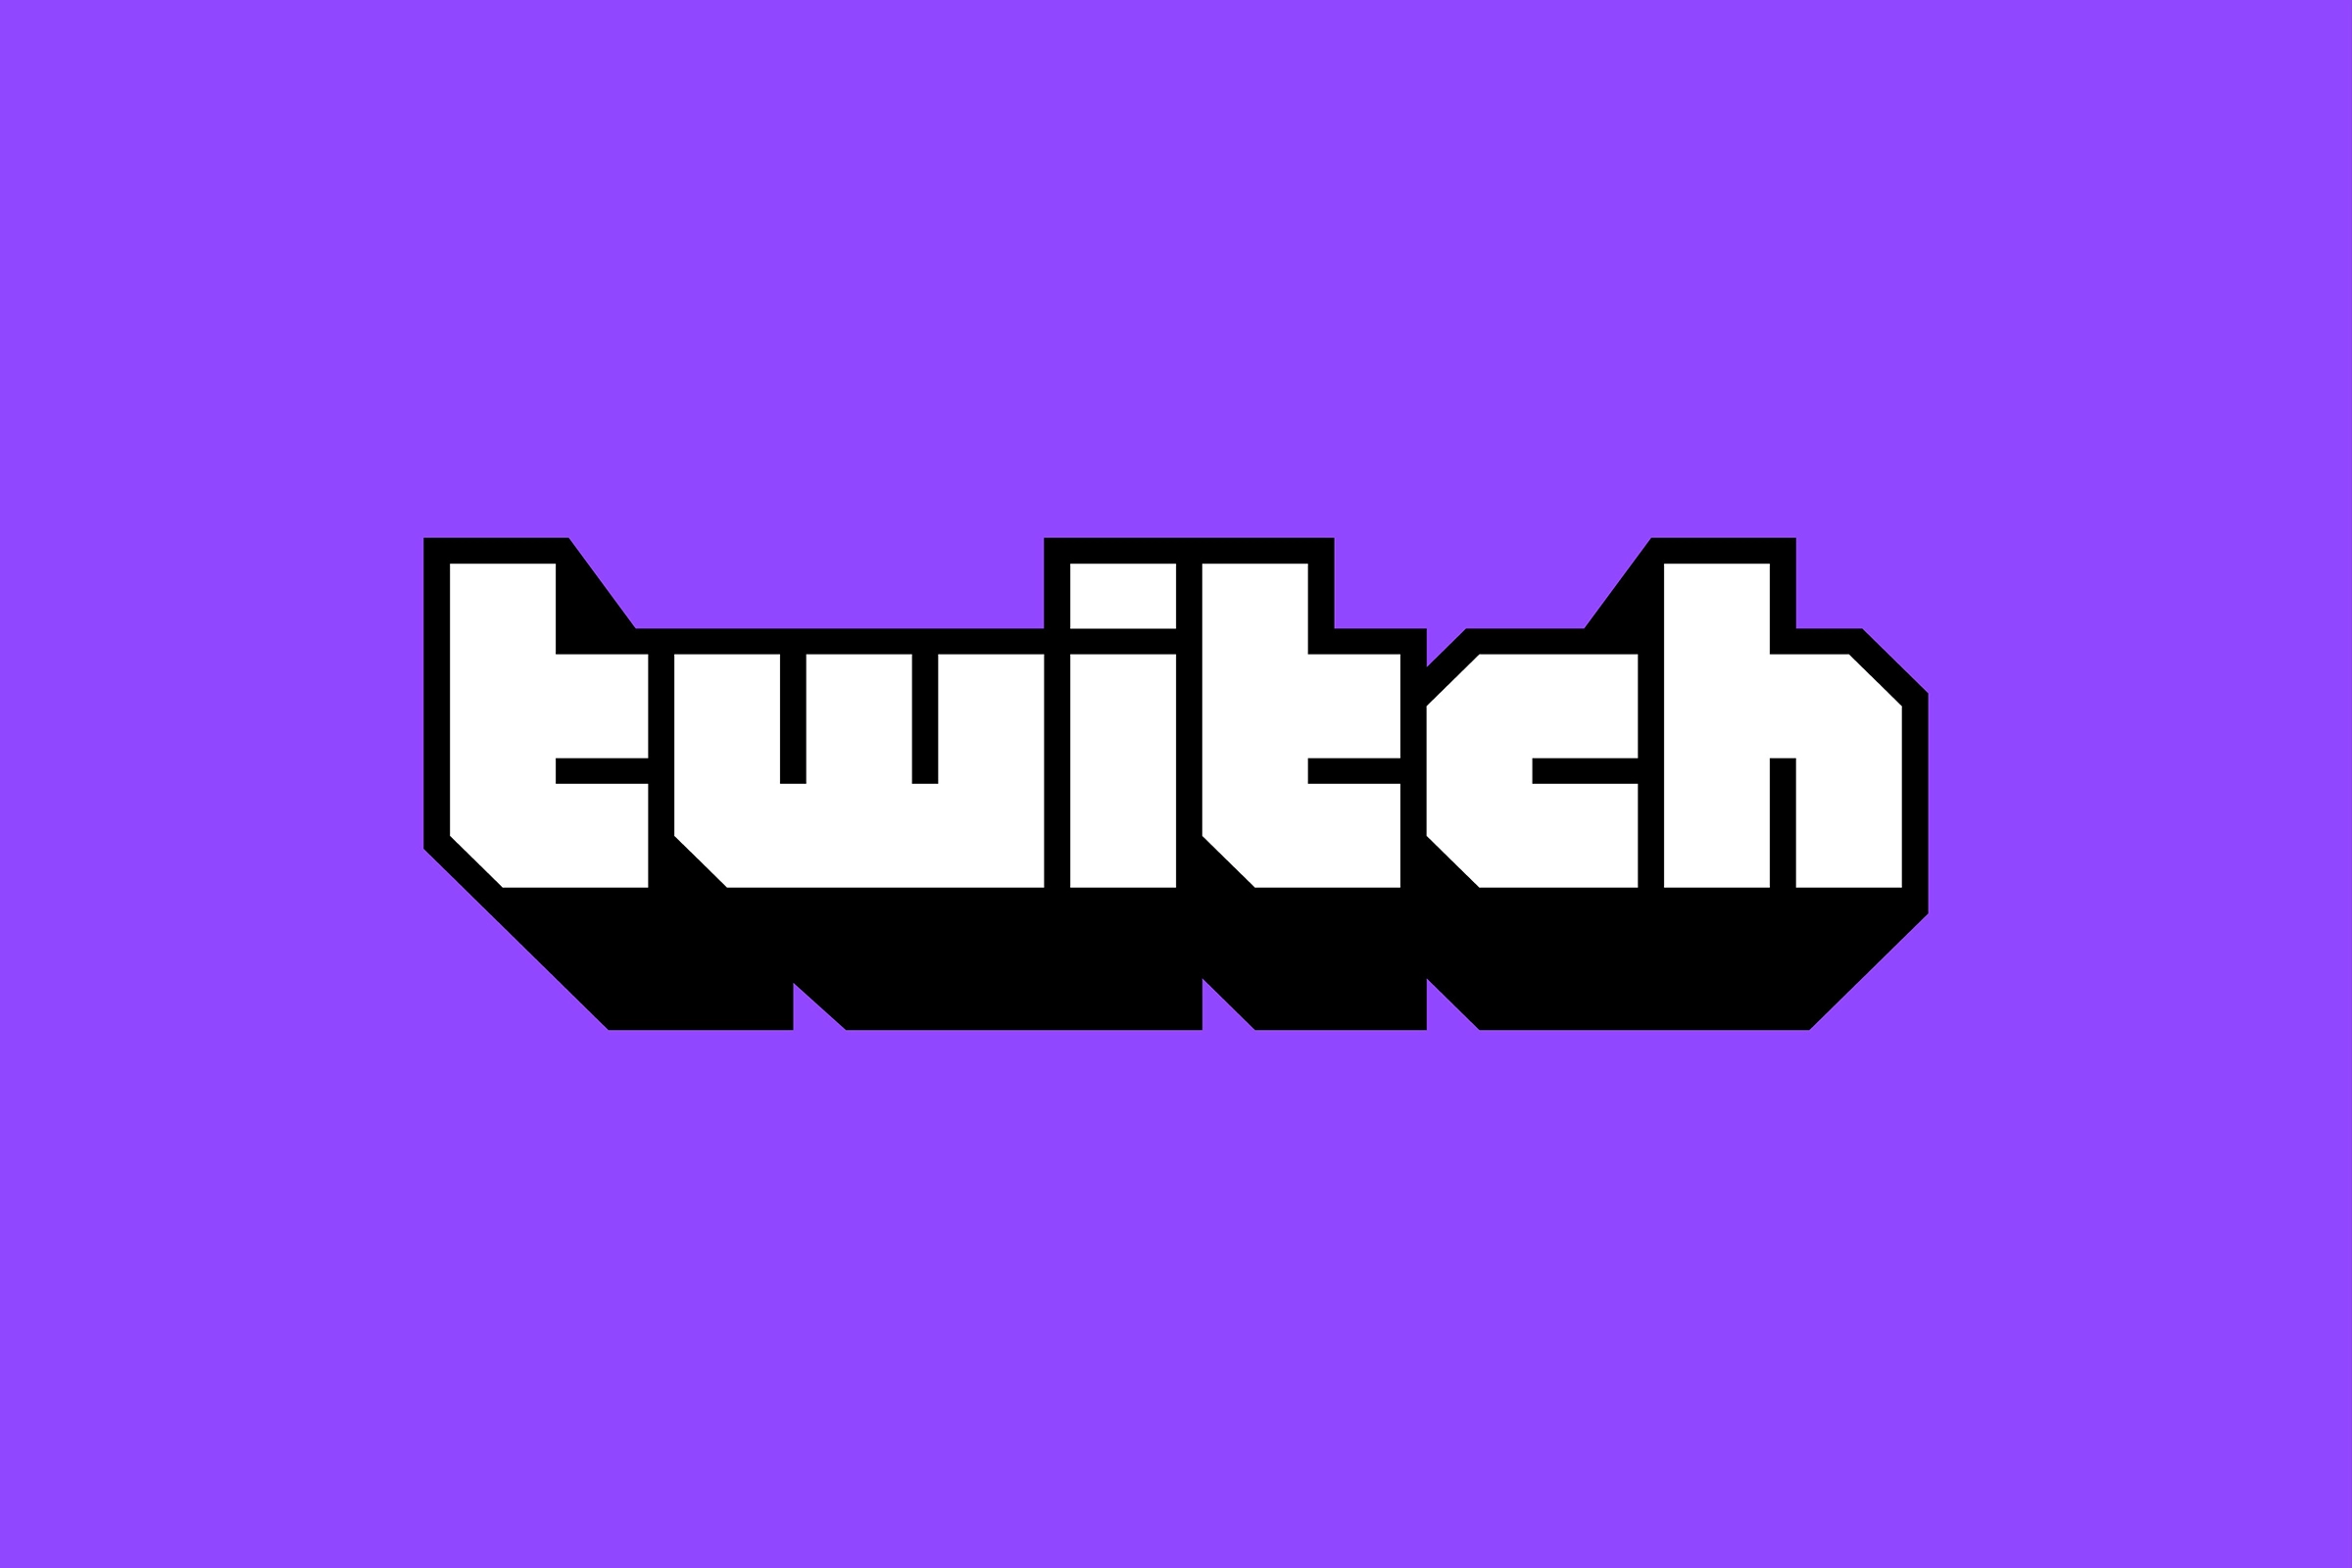

Nowadays, the gaming business is huge. Millions of dollars are spent in esports each year, and many new businesses want to get involved right now.  
Since the very beginning, **Twitch** has been the best application for streamers, every day, millions, if not billions, of people watch twitch feeds.This dataset assembled the,**Top 1000 Streamers** from 2020 who were streaming on twitch. This dataset was created by AAYUSH MISHRA and is availabe on [kaggle](https://www.kaggle.com/datasets/aayushmishra1512/twitchdata?select=twitchdata-update.csv) (dataset+description including)

Twitch is such an entertaining platform which allows direct interaction between the viewer and the personality that we are being entertained by, also allow us to enjoy a game we don't have or someone playing better than us as long as following instructive channels. 

During the Covid Pandemic, a lof of people joined to platform as a viewer like me or as Streamers.That's when I was really interested by it, I was wondering **What are the top streamer channels and what does they have in common?**. 

Thus, I think that this dataset will be interesting to see how the best channels work and to compute a lot of statistics on them. We can compare our results to this website https://twitchtracker.com/statistics, that computes a lot of statistics on Twitch.

## Data importation 💻📚

In [1]:
#Libraries we will need
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#let's see how the dataset look likes
df = pd.read_csv('twitchdata-update.csv')
df.head()

Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     English  
4   False     English

In [3]:
# For our categorical columns : here are the unique values
lenght= len(df['Language'].unique())
print(f'The {lenght} unique values of our categorical column Language :' + str(df['Language'].unique()))

The 21 unique values of our categorical column Language :['English' 'Portuguese' 'Spanish' 'German' 'Korean' 'French' 'Russian'
 'Japanese' 'Chinese' 'Czech' 'Turkish' 'Italian' 'Polish' 'Thai' 'Arabic'
 'Slovak' 'Other' 'Hungarian' 'Greek' 'Finnish' 'Swedish']


This dataset has 11 different columns.
- **Channel** : name of the twitch channel
- **Watch time** : the duration viewers have watched the stream *in minutes*
- **Stream time** : stream duration *in minutes*
- **Peak viewers** : maximum number of viewers
- **Average viewers** : average number of viewer by stream
- **Followers** : number of followers on twitch
- **Followers gained** : number of followers gained the previous year, if negative: lost of viewers
- **Partenered** : Twitch Partnered or not (Yes/No)
- **Mature** : 18+ or not (Yes/No)
- **Language** : Language of the channel (21 differents)

Because it's the top 10000 of the best channels of 2020, we have 10000 lines

In [4]:
#we can see that there is no missing values and also the datatypes for each column
#The dataset is 11X1000
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


The datatypes where well instanciated we don't need to do some modifications here. Also, there is no missing values! We have:

- 2 boolean columns: Mature & Partenered
- 2 object columns : Language & the Channel name
- 7 int values for the other columns


In [5]:
# With count we can see that all columns countains the 1000, so no missing values
df.describe()

Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160000   37065.051000   
std           5.496355e+08          85376.201364   60314.307686   
min           1.221928e+08           3465.000000     496.000000   
25%           1.631899e+08          73758.750000    9113.750000   
50%           2.349908e+08         108240.000000   16676.000000   
75%           4.337399e+08         141843.750000   37569.750000   
max           6.196162e+09         521445.000000  639375.000000   

       Average viewers     Followers  Followers gained  Views gained  
count      1000.000000  1.000000e+03      1.000000e+03  1.000000e+03  
mean       4781.040000  5.700541e+05      2.055185e+05  1.166817e+07  
std        8453.684965  8.044134e+05      3.399137e+05  2.490572e+07  
min         235.000000  3.660000e+03     -1.577200e+04  1.757880e+05  
25%        1457.750000  1.705462e+05      4.375825e+04  3.880602e+06  
50%        2425.000000  3.180630e+05      9.835200e+04  6.456324e+06  
75%        4786.250000  6.243322e+05      2.361308e+05  1.219676e+07  
max      147643.000000  8.938903e+06      3.966525e+06  6.701375e+08

An interesting thing is the Followers gained which has a negative minimum, it seems that the gain means also a possible loss of the followers which we'll have to keep in mind


## Data modifications and observations 🖊️🔍

**Let's have fun and create a new column for our next statistics**

The columns that intrigued me were Watch time and Stream time. Indeed, it's seems that the watch time is a good indicator that your streams are liked or not, the higher it is, the most views you got.For example, if someone come, see the stream and go after staying for 1 min it adds up 1 min. In the meantime, the Stream time is how long the channel streamed in the past year.

If we divide Watch time by Stream time we get what we can call a "viewing equivalent" than we can compare to the Average viewer.
- If the viewing equivalent ( the **Full viewer** column) is **higher** than the Average viewer it means that the streams attract a lot of people who **stays longer**
- If its lower it means that there is a lot of people on the stream that comes and go

In [6]:
#df Full viewer represent the amount of watch time for the stream
df['Full viewer']= round(df['Watch time(Minutes)']/df['Stream time(minutes)'])
df['Full viewer']=df['Full viewer'].astype('int')

In [7]:
df['Keep viewer']=np.where(df['Full viewer']-df['Average viewers']>0, 1, 0)
df['Keep viewer']=df['Keep viewer'].astype('bool')
df.drop(columns=['Full viewer'],inplace=True)

In [8]:
df.head()

Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  Keep viewer  
0   False     English         True  
1   False     English         True  
2    True  Portuguese        False  
3   False     English        False  
4   False     English         True

Now, our data as a new **boolean** column **Keep viewer**

**Here is an interesting way to get a report on our data**

In [9]:
# Here is an interesting way to get a report on our data
#!pip install pandas_profiling
#import pandas_profiling as pp
#report=pp.ProfileReport(df)
#report

**Now, let's explore the behaviour of our data**

**Correlation Matrix:**

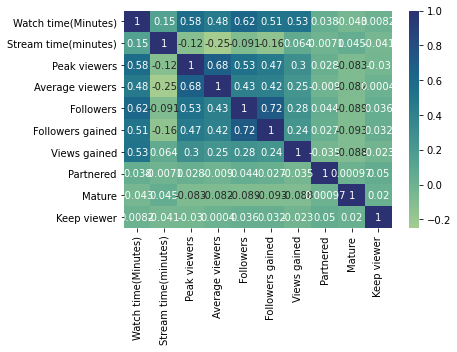

In [10]:
matrix=df.corr()
p1=sns.heatmap(matrix, annot=True, cmap="crest")

This heatmap is interesting because we can see how collerated the features are. For example we can observe tha followers gained seem strongly linked to the number of followers and the number of peak viewers as long as the watch time which make sens we can emphasize that the more a streamer is famous and thus a higher watch time, the more followers he has and he will then gained. 

On the other hand, an interesting row is the Stream time which seems no and almost negatively correlated to all of the other columns. For example Stream time is negatively correlated with average viewer, it could mean that the channel makes a lot of videos which are easier to produce in some ways and thus has less viewer/video but still a good watch time in total because of all the added time, which makes sens because strem time is positively correlated to views gained (when someone open a stream it's counted as a view gained). 

To conclue, with this heatmap or correlation matrix, we can't get a lot of informations. The variables with most relation with each other are Followers and Followers gained something obvious, but we can take it and keep it in mind.

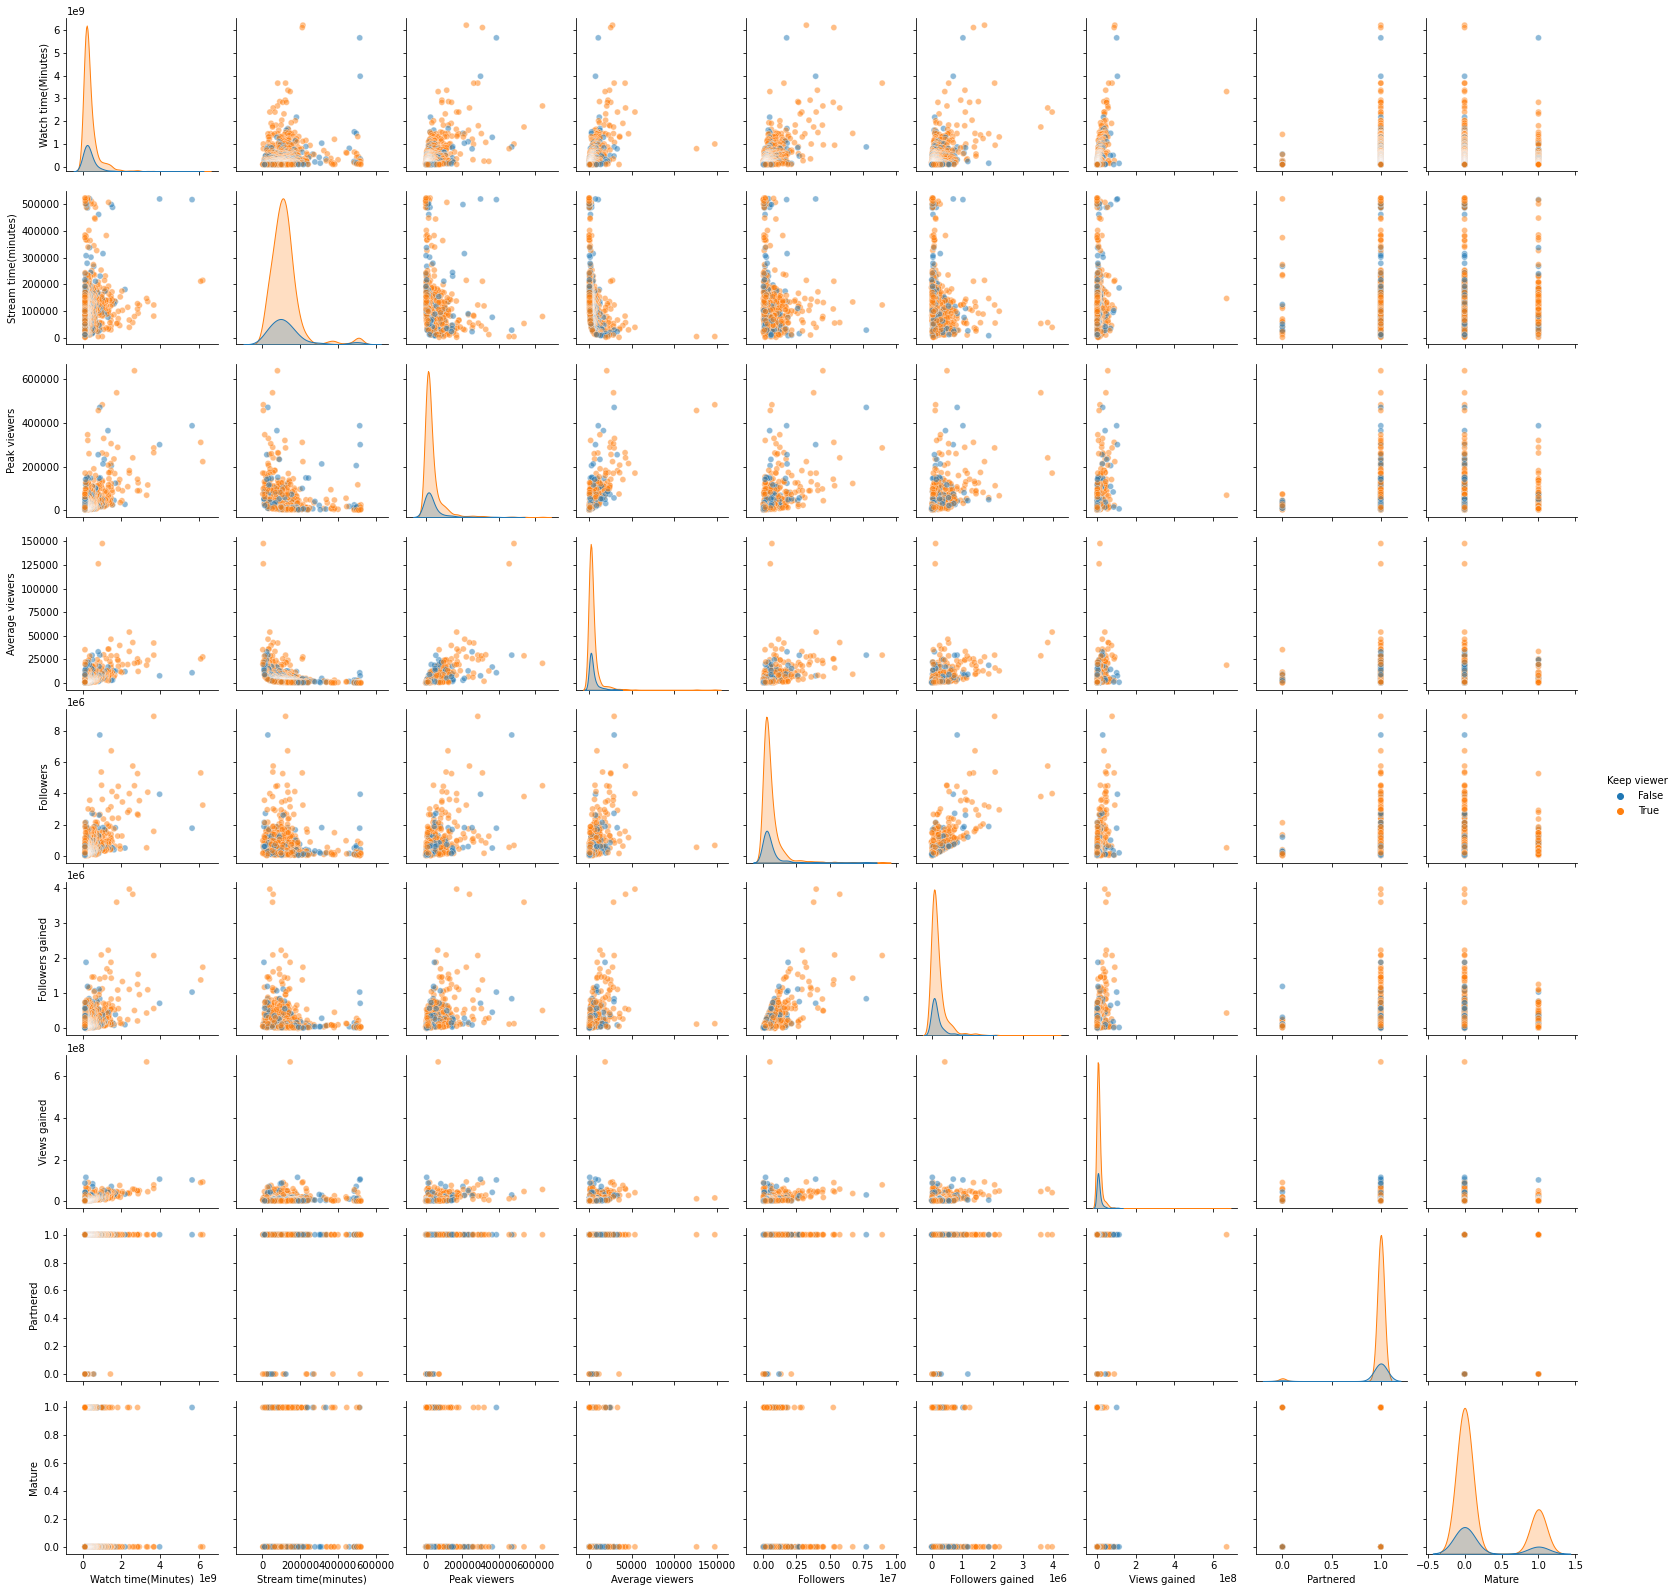

In [11]:
sns.pairplot(data=df,hue="Keep viewer",plot_kws={'alpha':0.5})

Interesting plot but not much info out of his, it doesn't seems that any of the feature is strongly linked to the fact that the channel keep a viewer or not :)

In [12]:
maturity = df['Mature'].value_counts()
print(maturity)

False    770
True     230
Name: Mature, dtype: int64


Here we can see that most of the channels doesn't have a +18 filter, maybe because as opposed to lesser broadcasters who would prefer a technique to weed out younger viewers, famous streamers would use this as a way to capture all the audience they can.

As we can find on the following pie plot from https://twitchtracker.com/languages , let's see if the channels LAnguage follow the same distribution.
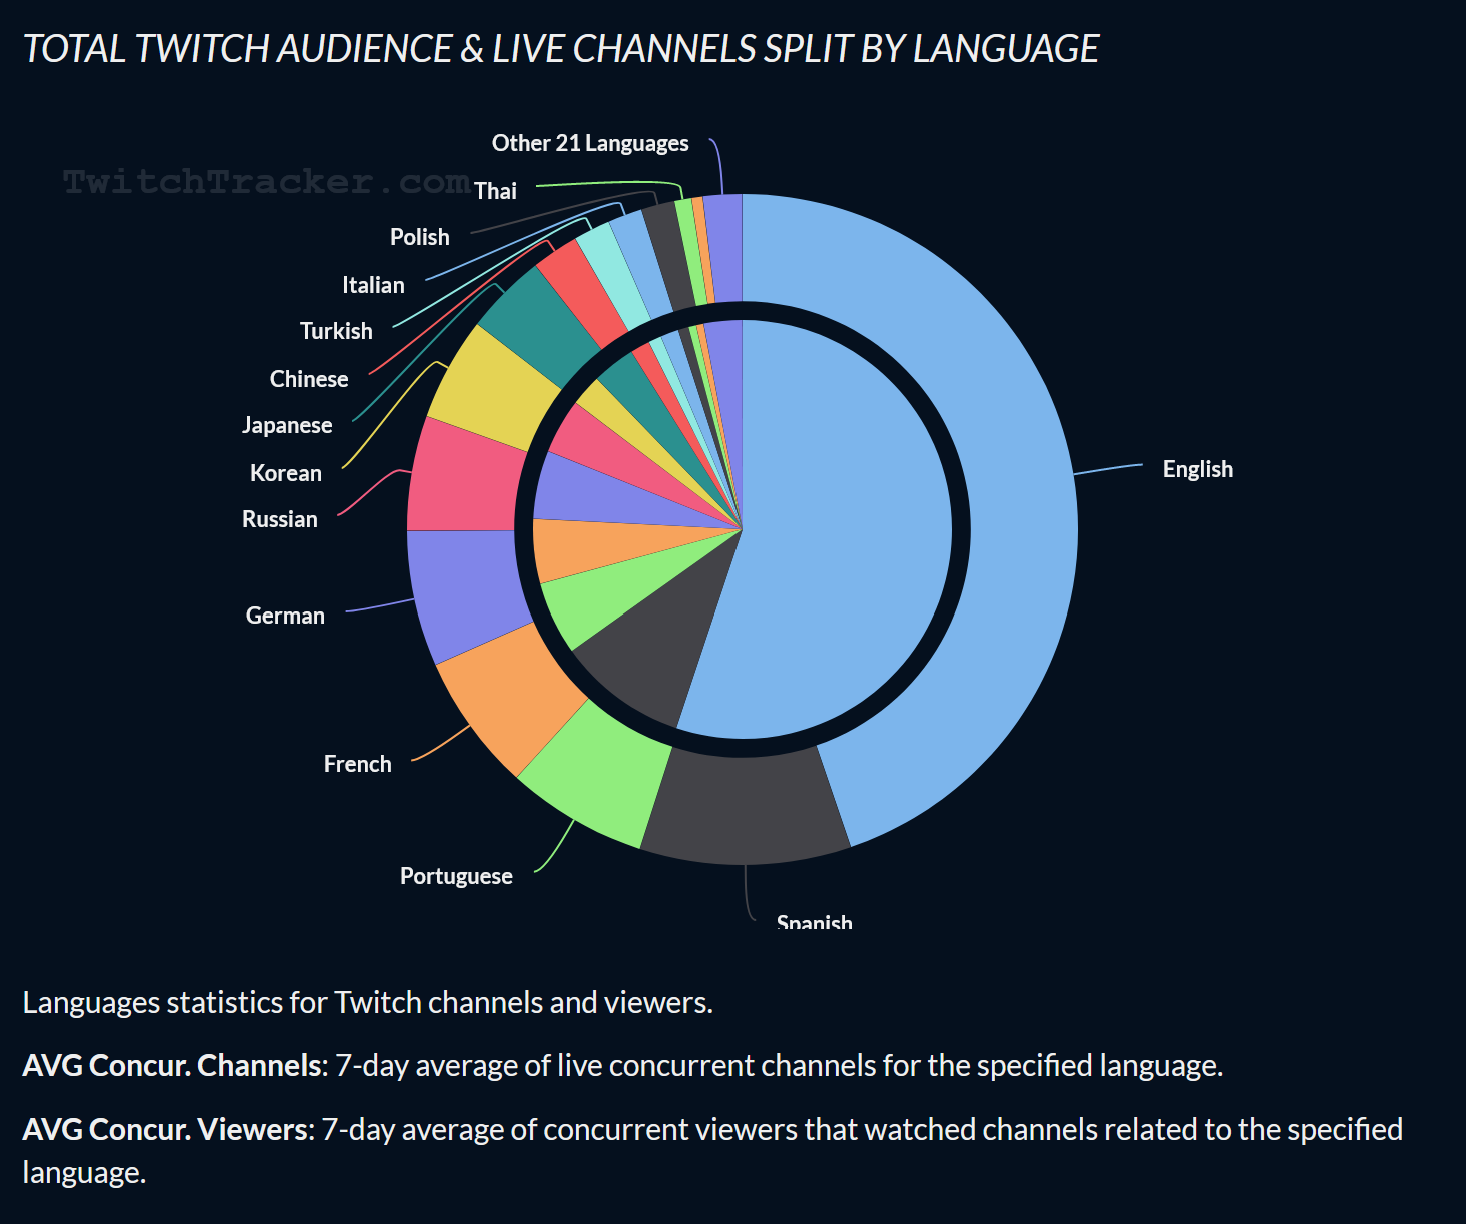

[]

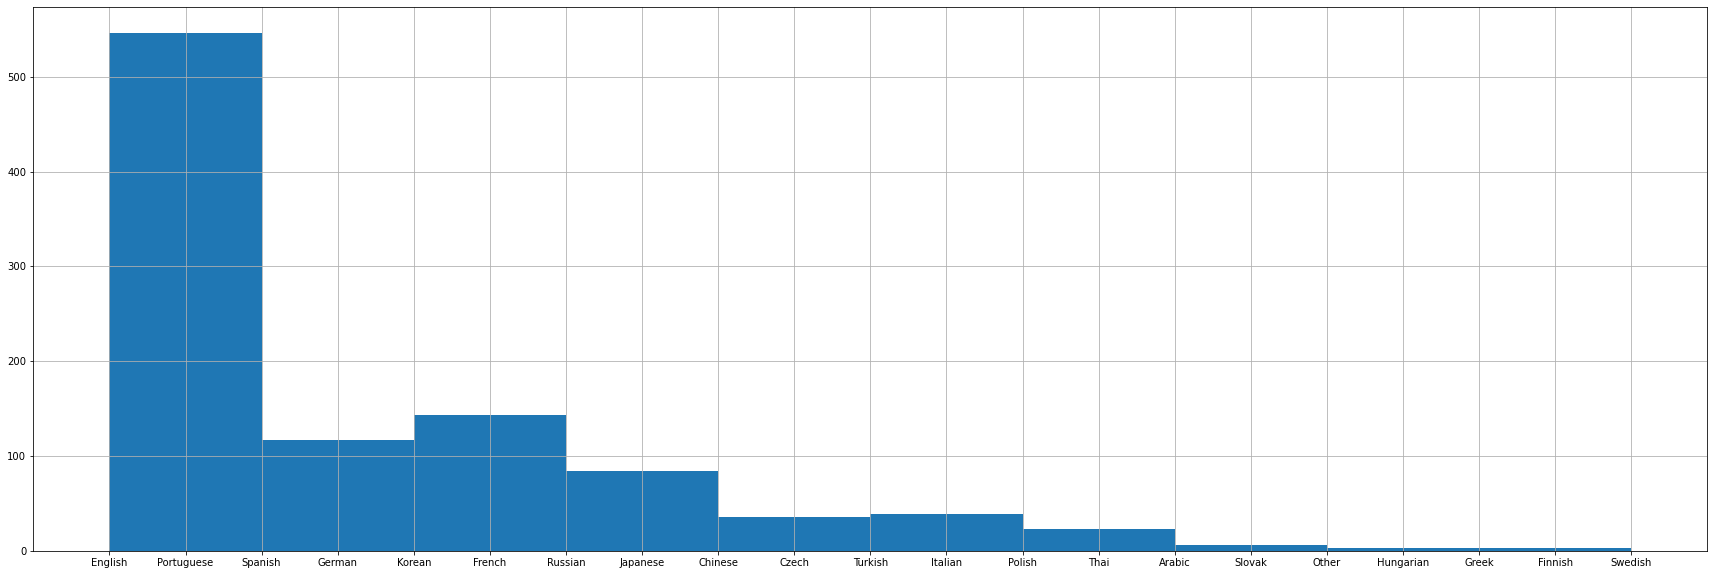

In [13]:
languages = df['Language']#.value_counts()
languages.hist(figsize=(30,10))
plt.plot()

We can see that the main Languages are English and Portuguese. This insn't suprising as the US and Brazilian streamers are among the top streamers in audience on Twitch and follows the results gathered from the website, thus the data seem cohesive 🙂

This first part was really important to make in order to understand if our data was cohesive. Because I decided to use a Kaggle dataset wich was created from web scrapping, a lot of incoherences could occur and it was really important to understand if our data could be used or not and thus if our analalysis would be relevant!

## Data visualization 📊✨

 Now let's do some Data visualization. The prerequisite given were 
 
 - at least one histogram, box plot, bar plot, line plot, and scatter plot
 - at least two univariate plots, two bivariate plots, and two multi-variate plots
 
To do this analysis we will ask ourself multiple questions that will be answered with our visualization 🙂✨

1. **What is the average viewer distribution?** -univariate & hist
2. **What is the link between streaming time v/s Average viewer& v/s followers gained?** -bivariate & lineplot
3. **How is distributed the amount of Peak viewers?** -Univariate & barplot
4. **Which are top 10 channels that got the highest Peak viewers?** -bivariate & barplot
5. **What is the distribution of Watch time if the Channel is Partnered or not?** - mulitvariate & boxplot + **What is the impact of a mature channel?** -bivariate & boxplot
6. **What is the distribution of Views gained and Peak viewers by type of channels?** -multivariate & scatter (2D & 3D)



### 1. 

Let's start our analysis with a base plot, i was wondering how behave the Avrage viewer distribution. Is it rather sparse or does it follows some kind of normal distribution ?

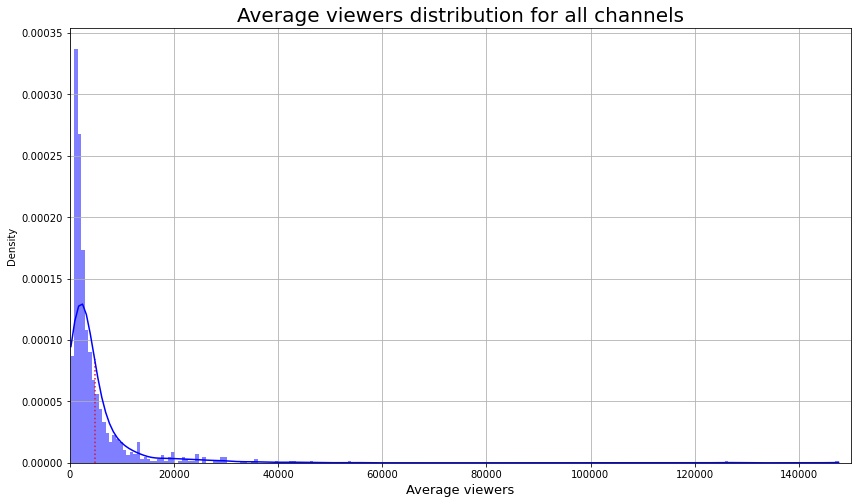

In [14]:
#Average viewer distribution -univariate & hist
#plot the Average viewers distribution
fig, ax = plt.subplots(figsize=[14,8])
sns.histplot(df['Average viewers'],ax=ax, color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
ax.set(xlim=(0, 150000))
ax.set_title('Average viewers distribution for all channels',fontsize=20)
ax.set_xlabel('Average viewers',fontsize=13)

#plot the mean
mean = df['Average viewers'].mean() #4781
xs = ax.lines[0].get_xdata()
ys = ax.lines[0].get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color='crimson', ls=':')

#show
plt.grid()
plt.show()

Analysis : We can see that the distribution of average viewer follows more or less a **normal distribution** and that between the top 10000 channels, the average number of viewer is less than 20 000. It's ineteresting because it could mean than it's not only the average viewer that has an impact of how famous a channel is and this is linked to the "Keep viewer" column we created. A good stream is also about how long you can keep a viewer. But it's only an hypothesis, we would need more "normal" channel to compare it to :)

### 2.

To get more understandment of the Average viewer behavior let's explore it's distribution by stream time and then compare this with the evolution of followers gained by stream time to se if we get some kind of correlation.

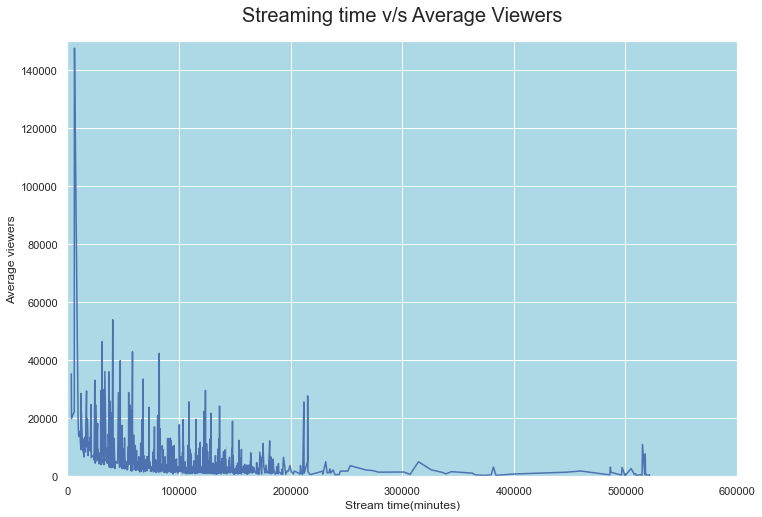

In [15]:
plt.figure(figsize=(12,8)) #comparing streaming time v/s average viewers
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
sns.lineplot(data= df ,x='Stream time(minutes)', y='Average viewers', palette = "Set1")
plt.title('Streaming time v/s Average Viewers', fontsize = 20, pad=20)
plt.ylim(0, 150000)
plt.xlim(0, 600000)
plt.show()

We can observe a peak of average viewer for short stream. It could be because some of the stream are shorter but better in the sens that the streamer prepare more of the thigs he will talk about and show such as the official channels of tornements which stream less but still attract a lot of viewers as seen in the previous analysis.

In [16]:
#same line plot with plotly
df = df.sort_values("Stream time(minutes)")
fig = px.line(df,x='Stream time(minutes)', y='Followers gained', title='Streaming time v/s Followers gained')
fig.show()

The followers gained by Stream time seems to have a diverse distribution. We can observe some pics around a smaller streaming time which could be linked as detailed previously to an higher quality of the stream. We can also observe than there is a period of stream time between 250000 to around 50000 where there is no much pics or evolution and then there is a lot of followers gained. This might also be linked to the fact that most of the streamers worked y themselves and some stream a long time and interact a lot with their followers which might attract a lot of viewers.

Analysis : We can observe here that a lot of viewers seems attracted by channels with a **stream time less than 250000 on average**. A lot of the Averaged viewers and followers gained seems to really be attraced by either a channel that stream less with maybe a **better content** or by channels that **streams more** but have **more interaction with their viewers**, but it's only an assumption.
But overall, it doesn't seems that a channel need to stream a lot within the top channels to be the best ones.

### 3.

Another good metris to understand within the best channels, how behave the viewer distribution is the **Peak viewer** column which indicated the highest value the channel got on a stream.

Now we will analyse this grouped distribution of the Peak viewers

In [17]:
#little reminder 
df['Peak viewers'].describe()

count      1000.000000
mean      37065.051000
std       60314.307686
min         496.000000
25%        9113.750000
50%       16676.000000
75%       37569.750000
max      639375.000000
Name: Peak viewers, dtype: float64

We will "cut" our values in group :'Low', 'Medium','High', 'Very High' and based on the values from the **describe** function,  we can instanciate that : 
- Low = Peak viewers < 50000
- Medium = 5000 <Peak viewers <25000
- High = 25000 <Peak viewers < 45000
- Very High = 45000 <Peak viewers < 65000

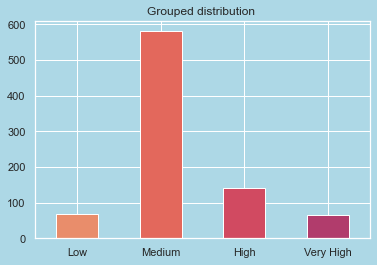

In [18]:
#Bar plot- Uni
new_cut =pd.cut(df['Peak viewers'], bins=[0,5000, 25000, 45000,65000]
            ,labels=['Low', 'Medium','High', 'Very High'])
ax = new_cut.value_counts(sort=False).plot.bar(rot=0, color=sns.color_palette('flare'), figsize=(6,4))

plt.title('Grouped distribution ')
plt.show()

Analysis : We can see that as expected most of the values are in the medium group, not suprising as it's around the mean values we got while desribing the distribution of the *Peak viewers column*. The interesting element is that there is an higher distribution of High group of *Peak viewers* than the low *Peak viewers* which seems logical as the more *Peak viewers* you get the most your streamed was seen or was **trending** and thus you'll end un in the top 10000 channels. But from this plot and the previous ones it seems that there is a group within this top channels that have metrics higher than the average.

### 4.

From our previous analysis, there is some outliers within our data. Predictable? of course, it was daring to hope to seek a trend with this kind of web-scrapped data. But for the purpose of our analysis let's see who seems to be thoses outliers. We will plot our Top 10 most trending channels by Peak viewers of course.

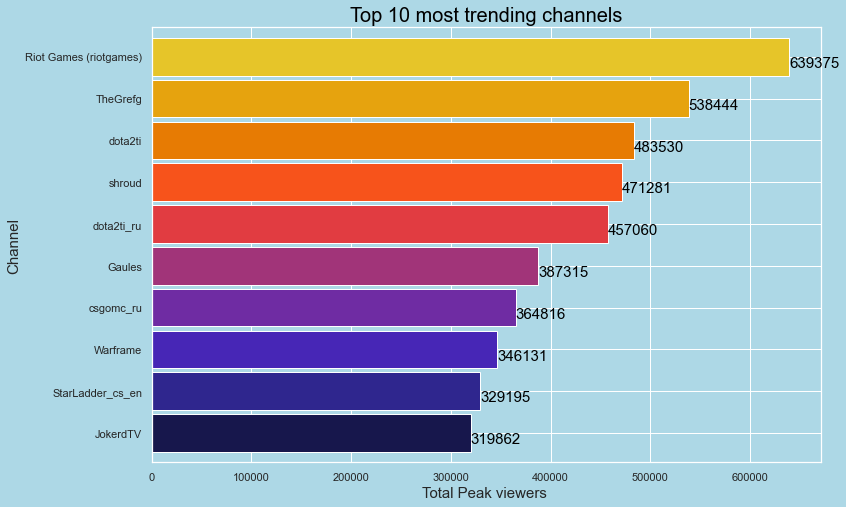

In [19]:
#sort dataframe
most_rated = df.sort_values('Peak viewers',ascending=False).head(10).set_index('Channel')

#create the plot
plt.subplots(figsize=(12,8))
ax = most_rated['Peak viewers'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Total Peak viewers ", fontsize=15)
ax.set_ylabel("Channel", fontsize=15)
ax.set_title("Top 10 most trending channels",fontsize=20,color='black')

#add the numbers of peak viewers
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
#show :)
plt.show()

Analysis : A bit annoying to don't have the categories of the stream to know what kind of stream these channel does. From a quick search on internet, they all do live gaming and 3 of them are official channels of Esport tournament :) So not suprinsingly  they are really famous!

Little reminder than our median is 16676, so theses channels are 3x up to 6x times higher!!!

Within let's say our 100 top best, are they partenered or not?

In [20]:
most_rated_25 = df.sort_values('Peak viewers',ascending=False).head(25)
most_rated_25['Partnered'].value_counts()

True    25
Name: Partnered, dtype: int64

Whats is the rank of the channel that aren't partnered?

In [21]:
new_df=df.sort_values('Peak viewers',ascending=False)
liste_index=new_df[new_df['Partnered'] == False].index.tolist()
low=0
for elements in liste_index:
    if str(elements)[0] == '9':
        low+=1
    if str(elements)[0] == '8':
        low+=1  
print('Percent of channel non partnered in the 200 last ranks : '+str((low/len(liste_index)*100))+'%')

Percent of channel non partnered in the 200 last ranks : 50.0%


So, it seems that most of the channels are partnered and within them the Top 100 are while the bottom 200 get most of the channels non partenered. It seems that the rank can be modified if a channel is partnered or not, but it's rather hard to analayse. Like the Egg and the chicken, did the channel became famous thanks to the money of the sponsorship or was the channel sponsored because it was famous?

### 5.

If the Top channels are partnered, let's explore if the fact that a channel is Partnered or not increase the watch time (if the channel is attractive or not) and its impact while a channel keep a viewer or not. our Keep viewer is here an indicator of a good channel or not, the ones that have the strongest community.

In [22]:
#little fid added :)
fig = px.box(df,x='Partnered', y="Watch time(Minutes)",color='Keep viewer',title='Distribution of Watch time if the Channel is Partnered or not')
fig.update_traces(boxpoints=False) 
fig.show()

Thank to plotly we can zoom and thanksfullly because we got a lot of disparsity (a really high value as an highest value compare to the mean). First of all, we can see a huge increase of the highest value if our channel is partnered or not but this is linked to the fact tham moste of the non partnered channels are on the bottom of the ranking and thus get less watch time. We can see that the Partnered factor does seems to impact the fact that a channel keep a viewer or not, we can see that the meand ratio of keep a viewer or not is higher when the partnered is false that when its true, which follow our hypothesis that channels with less money tends to built their sucess on a strong comunnity.

To the purpose of the anlaysis, let's see the distribution of the watch time if a Channel has mature content only or not.

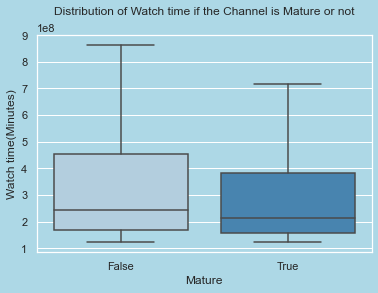

In [23]:
# we get rid of outliers to understand this dristribution better
sns.boxplot( x=df["Mature"], y=df["Watch time(Minutes)"],showfliers=False, palette="Blues")
plt.title('Distribution of Watch time if the Channel is Mature or not', fontsize = 12, pad=20)
plt.show()

Analysis : This next figure was created to understand the impact on the distribution of Watch time if the Channel was registered as mature or not.
As seen in the previous analysis  most of the channels doesn't have a +18 filter, maybe because as opposed to lesser broadcasters who would prefer a technique to weed out younger viewers, famous streamers would use this as a way to capture all the audience they can. So it's interesting to the the distribution of the view now. On average it doesn't seems to impact that much the mean watch time but we can see that the highest value is higher with almost *2x10^9 difference*

### Middle Conclusion 🤓

From All of the previous analysis, it seems that we have thre type of channels.
- Our "out of the game" channels : They are kind of outliers because their metrics are so high, they are partnered and offer non mature contente because they want to attract a lot of people. Most of them are official Egaming channels.
- Our "middle" channels: Most of them are Partnered and also offer non restricted content.
- The "Unique" channels: might not be partnered, they watch time is high but get an average viewer mean pretty low. The basis of they channel seems to be based on specific content that attract a strong community.

For the most of these channels we can split our groups based on the amount of Followers.

### 6.

After identifyion those kind of channels let's see how they behave and more specifically how the view s gained and the peak viewers evolve for them.

In [24]:
# Lets create a new categorical column based on our analysis
new_df=df
new_df['Type of Channel'] =pd.cut(df['Followers'], bins=[0,150000, 650000, 10000000],labels=['Unique', 'Middle','Out of the game'])

In [25]:
fig = px.scatter(new_df, x="Peak viewers", y="Views gained", color='Type of Channel', color_discrete_sequence= px.colors.qualitative.Dark24,title='Distribution of Views gained and Peak viewers by type of channels')
fig.show()

As expected we can isolate easily our group. For the unique group, it seems that the peak viewer isn't correlated with the views gained which means which make sens because thoses channels have less followers so there stream is less prone to have higher peak viewers. The interesting element here is the "out of the game" class which seems to have a linear correlation between the two categories which could mean that most of the views gained come with the peak viewers so with streams that attract a lot of people such as official tornament.

---------------



So our first question was ***What are the top streamer channels and what does they have in common?*** .From our previous analysis it seems that we can identified 3 categories of channels: The Out of game, the Unique and the middle one. The main features that seems to seperate them are **Followers, Peak viewers and Watch time**, let's plot this dirstibution in 3D to see the group separation.

In [26]:
fig = px.scatter_3d(new_df,  x="Followers", y="Peak viewers", z='Watch time(Minutes)',
              color='Type of Channel')
fig.show()

## Wrap-up 👩‍💻📖

*Comment on any insights you’ve obtained from your data exploration and
visualization*

*Offer at least three questions that you would explore in greater detail if you had more time to do research with this data
⚠️ One will be explored with Tableau ⚠️*

To conclude, from our previous analysis, we isolated three types of channels based on their number of followers, their views and the amount of viewers they got on their Peak view. This separation was made from some study on the evolution of these features by stream time.Our hypothesis was that there is two group of channels really different. One which is mostly partnered and offer shorter stream time but better/hugh quality, we identified those channels as "Official" ones which host tornament for example. The other group would be one that offers longer stream but has a huge ration follower by stream time because they seem to offer a specific content that attract a specific community that tends to stay longer on the streams. The thrid group was our majority group, really diverse when the amount of followers and followers gained seems posotively correlated.

 


For the nex part of our exploration, we could work on :

First some analysis on the rank by countries.
- **Which country has the best statisctics?** what are the top countries for the different type of channels?

Maybe more exploration about the rank of the streamers.
- What metrics know the higest evolution within the rank? (easily visible with a line plot)

And more analysis on the categorical columns.
- Does most of the channels that keep the viewer are official stream channels ? 
For the last one I would had done a bit of web scrapping to get more informations about all of the channels, it would have been a fun thing to do!!

--> **Which country has the best statisctics?** will be the question we will explore with Tableau 🙂

---------------------

What metrics know the higest evolution within the rank? (just to see)

In [27]:
df = pd.read_csv('twitchdata-update.csv')
df.head()

Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     English  
4   False     English

In [28]:
#because the range of our values is pretty big let's scale them
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
#What metrics know the higest evolution within the rank?
# Just for fun let's answer this question
# Create dataframe
df.iloc[:,3:-3] = scaler.fit_transform(df.iloc[:,3:-3])
# Create Line plot
fig = px.line(df, x=df.index, y=df['Views gained'])

# Add Scatter plot
for column in list(df.iloc[:,3:-3].columns):
    fig.add_scatter(x=df.index, y=df[column],name=column)
# Display the plot
fig.show()